In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [11]:
'''
the training data was obtained from https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist/input. As the file is
large and create issues while pushing on github, I am deleting this from my github directory.
'''
data_train = pd.read_csv('train.csv')
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

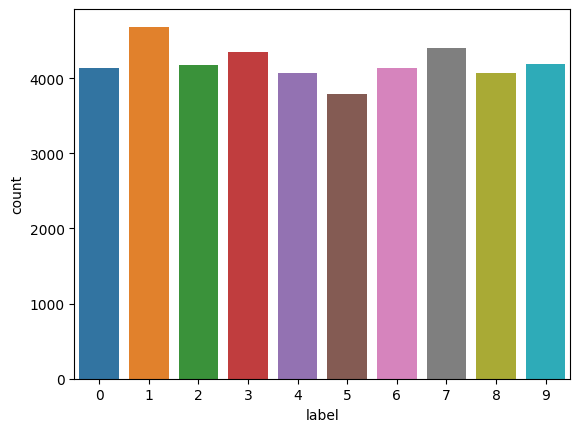

In [108]:
fig = plt.figure()
sns.countplot(data=data_train, x='label')
plt.show()
fig.clear()

In [21]:
print('Maximum pixel value in the dataset is',(data_train.max()).max())
print('Minimum pixel value in the dataset is',(data_train.min()).min())

Maximum pixel value in the dataset is 255
Minimum pixel value in the dataset is 0


In [110]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Input, Rescaling, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler

In [61]:
scaler = Rescaling(1./255)
Y = data_train["label"]
X = data_train.drop(labels = ["label"],axis = 1)
X = X.apply(lambda x: scaler(x))
X = X.values.reshape(-1,28,28,1)
Y = to_categorical(Y, num_classes = 10)
print(X.shape)
print(Y.shape)

(42000, 28, 28, 1)
(42000, 10)


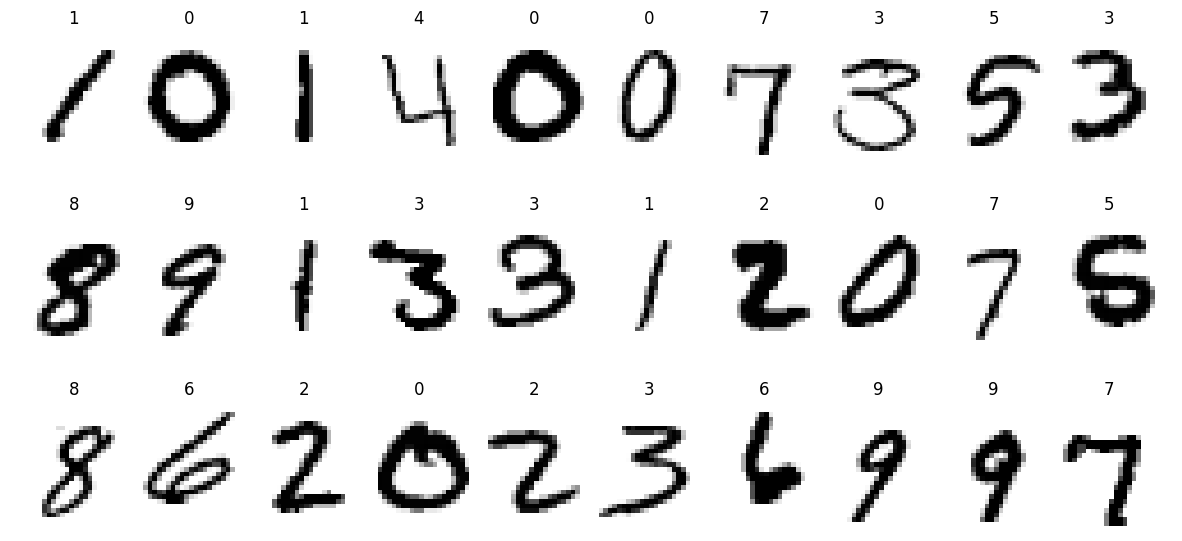

In [38]:
plt.figure(figsize=(15,7.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(Y_train[i])
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [109]:
model = Sequential([Input(shape=(28,28,1))])

model.add(Conv2D(16, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 13, 13, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 9, 9, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 9, 9, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2592)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 2592)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          25,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,778 (182.73 KB)

 Trainable params: 46,586 (181.98 KB)

 Non-trainable params: 192 (768.00 B)

In [64]:
history = model.fit(X_train, Y_train, 
                    validation_split=0.2, 
                    epochs=15, 
                    batch_size=64, 
                    verbose=1)

Epoch 1/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 30s 58ms/step - accuracy: 0.7204 - loss: 1.0278 - val_accuracy: 0.9429 - val_loss: 0.1931
Epoch 2/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9504 - loss: 0.1574 - val_accuracy: 0.9740 - val_loss: 0.0845
Epoch 3/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9648 - loss: 0.1123 - val_accuracy: 0.9805 - val_loss: 0.0702
Epoch 4/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.9702 - loss: 0.1017 - val_accuracy: 0.9790 - val_loss: 0.0675
Epoch 5/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9732 - loss: 0.0886 - val_accuracy: 0.9790 - val_loss: 0.0685
Epoch 6/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9773 - loss: 0.0718 - val_accuracy: 0.9838 - val_loss: 0.0573
Epoch 7/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9792 - loss: 0.0655 - val_accuracy: 0.9875 - val_loss: 0.0470
Epoch 8/15
420/420 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9790 - loss: 0.0643 - 

In [65]:
model.save('CNN_handwritten_digits_model.h5')

In [75]:
Y_pred = model.predict(X_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [80]:
Y_pred_label = np.argmax(Y_pred, axis=1)
Y_test_label = np.argmax(Y_test, axis=1)
print(Y_pred_label[8])

2


In [93]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [94]:
precision = precision_score(Y_test_label, Y_pred_label, average='weighted')
recall = recall_score(Y_test_label, Y_pred_label,average='weighted')
f1 = f1_score(Y_test_label, Y_pred_label,average='weighted')
print(f'Precision score: {precision}')
print(f'Recall score: {recall}')      
print(f'F1 score: {f1}')

Precision score: 0.990128291026703
Recall score: 0.9901190476190476
F1 score: 0.9901167420002445


In [82]:
conf_mat = confusion_matrix(Y_test_label, Y_pred_label)

In [84]:
print(conf_mat)

[[844   0   0   1   0   0   1   0   1   1]
 [  0 920   1   0   1   0   2   2   0   0]
 [  0   3 875   0   1   0   0   8   0   1]
 [  0   0   2 872   0   1   0   0   2   2]
 [  2   0   1   0 780   0   2   0   0   3]
 [  0   0   0   2   0 737   4   0   0   2]
 [  1   0   0   1   0   0 805   0   0   0]
 [  0   5   2   0   1   1   0 895   0   2]
 [  2   1   2   1   1   4   1   0 765   1]
 [  2   0   1   0   3   1   0   3   1 824]]


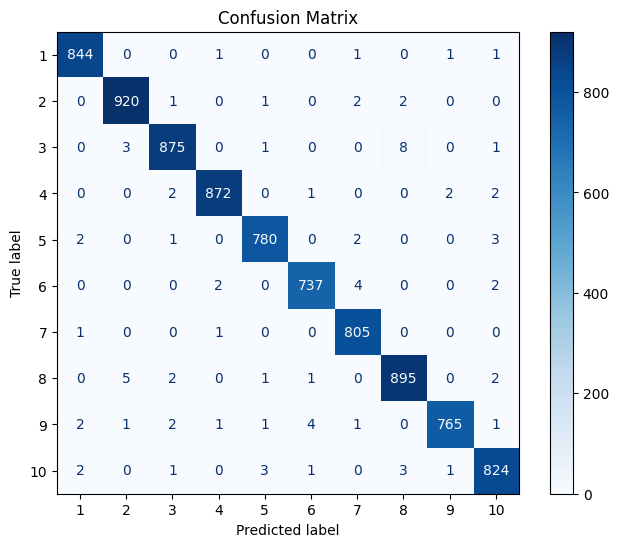

In [88]:
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=range(1,11))
disp.plot(ax=ax, cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

## Lets see how a normal neural network architecture performs here

In [115]:
model = Sequential([Flatten(input_shape=(28,28,1))])

# Hidden layer
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │          23,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,755 (96.70 KB)

 Trainable params: 24,755 (96.70 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history = model.fit(X_train, Y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=64, 
                    verbose=1)

Epoch 1/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5129 - loss: 1.3454 - val_accuracy: 0.8969 - val_loss: 0.3610
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9096 - loss: 0.3192 - val_accuracy: 0.9286 - val_loss: 0.2502
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9337 - loss: 0.2220 - val_accuracy: 0.9341 - val_loss: 0.2324
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9481 - loss: 0.1808 - val_accuracy: 0.9435 - val_loss: 0.1908
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9570 - loss: 0.1460 - val_accuracy: 0.9449 - val_loss: 0.1872
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9604 - loss: 0.1296 - val_accuracy: 0.9415 - val_loss: 0.1894
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9640 - loss: 0.1191 - val_accuracy: 0.9501 - val_loss: 0.1723
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.1026 - val_accu

420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: 0.0131 - val_accuracy: 0.9540 - val_loss: 0.3462
Epoch 52/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0101 - val_accuracy: 0.9506 - val_loss: 0.3532
Epoch 53/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9963 - loss: 0.0091 - val_accuracy: 0.9580 - val_loss: 0.3146
Epoch 54/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9531 - val_loss: 0.3450
Epoch 55/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9551 - val_loss: 0.3594
Epoch 56/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9974 - loss: 0.0073 - val_accuracy: 0.9548 - val_loss: 0.3517
Epoch 57/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9542 - val_loss: 0.3512
Epoch 58/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy:

In [119]:
Y_pred = model.predict(X_test)
Y_pred_label = np.argmax(Y_pred, axis=1)
Y_test_label = np.argmax(Y_test, axis=1)
print(Y_pred_label[8])

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2


In [120]:
precision = precision_score(Y_test_label, Y_pred_label, average='weighted')
recall = recall_score(Y_test_label, Y_pred_label,average='weighted')
f1 = f1_score(Y_test_label, Y_pred_label,average='weighted')
print(f'Precision score: {precision}')
print(f'Recall score: {recall}')      
print(f'F1 score: {f1}')

Precision score: 0.9587949713150432
Recall score: 0.9586904761904762
F1 score: 0.9587005380589262


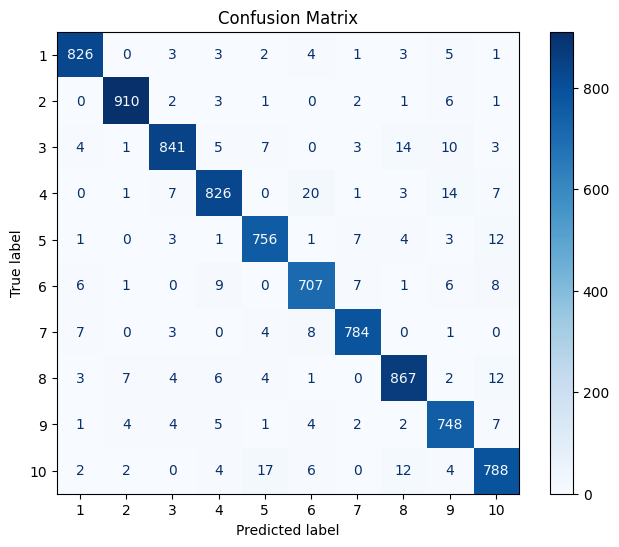

In [121]:
conf_mat = confusion_matrix(Y_test_label, Y_pred_label)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=range(1,11))
disp.plot(ax=ax, cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

### It is very clear that CNN performs much better (98.84% accuracy) compared to the traditional neural network (96.04% accuracy). However, this is already known and hence CNN is widely used for image and object recognition.

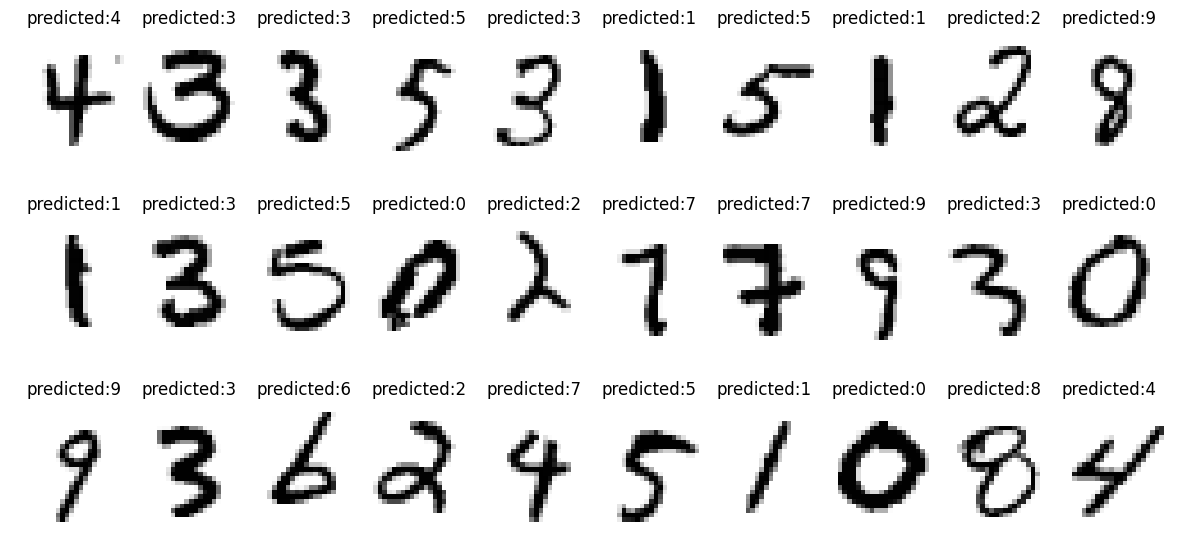

In [122]:
plt.figure(figsize=(15,7.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(f'predicted:{Y_pred_label[i]}')
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()